1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [13]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [14]:
# Generating a dataset with the three features as described in the text
np.random.seed(42)

x1 = np.random.normal(0, 1, 900)

x2 = x1 + np.random.normal(0, 3, 900)

x3 = 2 * x1 + x2


In [15]:
# Computing the covariance matrix of the dataset
v = np.stack((x1, x2, x3), axis=1)
np_cov = np.cov(v, rowvar=False)

In [16]:
# Eigendecomposition of covariance matrix
l, V = la.eig(np_cov)

# the eigenvalues
print("These are the eigenvalues:\n", l, '\n')
print("These are the real eigenvalues:\n", np.real_if_close(l), '\n')

# V is the matrix of the eigenvectors
print("This is the matrix of eigenvectors:\n", V, '\n')

These are the eigenvalues:
 [2.60799736e+01+0.j 1.54065665e-15+0.j 1.97851123e+00+0.j] 

These are the real eigenvalues:
 [2.60799736e+01 1.54065665e-15 1.97851123e+00] 

This is the matrix of eigenvectors:
 [[-0.1120637  -0.81649658  0.56637007]
 [-0.58159515 -0.40824829 -0.70361951]
 [-0.80572254  0.40824829  0.42912064]] 



In [17]:
# Singular Value decomposition
U, s, Vt = la.svd(np_cov)

print("Spectrum:\n", s, '\n')
print("The spectrum does not yield same result as the real eigenvalues from above, but this difference is down to small cifres.")
print()
print("U:\n", U, '\n')
print("The matrix U yields the same result as the eigenvectors from above in shuffled order.")

Spectrum:
 [2.60799736e+01 1.97851123e+00 4.41095696e-16] 

The spectrum does not yield same result as the real eigenvalues from above, but this difference is down to small cifres.

U:
 [[-0.1120637   0.56637007 -0.81649658]
 [-0.58159515 -0.70361951 -0.40824829]
 [-0.80572254  0.42912064  0.40824829]] 

The matrix U yields the same result as the eigenvectors from above in shuffled order.


In [6]:
# Performing the PCA to find the explained variance
explained_variance_ratio = np.real_if_close(l) / np.sum(np.real_if_close(l))

print("We see that the variability of the total dataset is explained by the three principal components in the following \npercentages:")
print("[x1, x2, x3]:",explained_variance_ratio)

We see that the variability of the total dataset is explained by the three principal components in the following 
percentages:
[x1, x2, x3]: [9.29486170e-01 5.49087615e-17 7.05138302e-02]


The distribution of the explained variance among the three principal components make sense, since the two features x2 and x3 are constructed from x1, it makes sense that the first principal components holds the most variance explained. 

In [7]:
# Dimension reduction so that at least 99% of the total variability in the dataset is retained 

Lambda = np.diag(np.real_if_close(l))
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", np_cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the first component, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the second component, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the third component, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()))


print("\nWe need two of the three principal components to retain at least 99% of the variability, which can be seen from \ntheir individual percentage of explained variance added up.")


# Redefining the data according to the new basis from the PCA
components_99_percent = np.argmax(np.cumsum(explained_variance_ratio) >= 0.99) + 1

pca = PCA(n_components=components_99_percent)
v_pca = pca.fit_transform(v)

Lambda:
 [[2.60799736e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.54065665e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.97851123e+00]] 

Trace(A):
 28.058484812397364 

Trace(Lambda):
 28.05848481239735 

By selecting the first component, we retain 0.93% of the total variability
By selecting the second component, we retain 0.00% of the total variability
By selecting the third component, we retain 0.07% of the total variability

We need two of the three principal components to retain at least 99% of the variability, which can be seen from 
their individual percentage of explained variance added up.


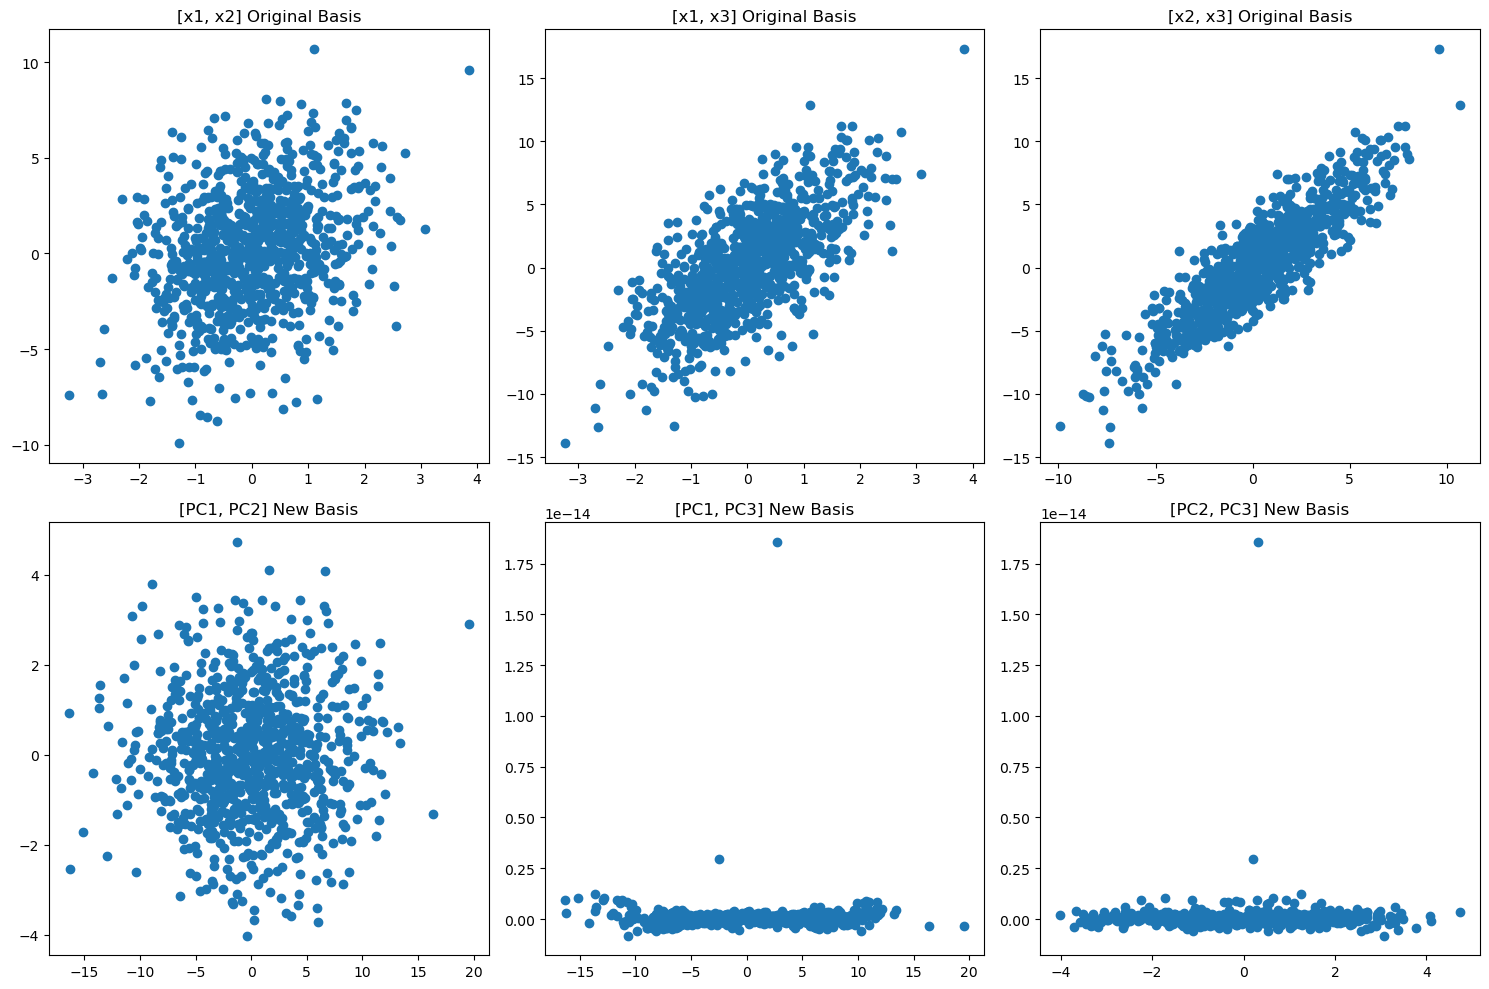

In [8]:
# Plotting the data in both the original and new bases
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(v[:, 0], v[:, 1])
axes[0, 0].set_title("[x1, x2] Original Basis")
axes[0, 1].scatter(v[:, 0], v[:, 2])
axes[0, 1].set_title("[x1, x3] Original Basis")
axes[0, 2].scatter(v[:, 1], v[:, 2])
axes[0, 2].set_title("[x2, x3] Original Basis")

axes[1, 0].scatter(v_pca[:, 0], v_pca[:, 1])
axes[1, 0].set_title("[PC1, PC2] New Basis")
axes[1, 1].scatter(v_pca[:, 0], v_pca[:, 2])
axes[1, 1].set_title("[PC1, PC3] New Basis")
axes[1, 2].scatter(v_pca[:, 1], v_pca[:, 2])
axes[1, 2].set_title("[PC2, PC3] New Basis")

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
# Generating uncorrelated random noise as 10 other normally distributed variables, all with mean = 0 and std = 1/20
noise = np.random.normal(0, 1 / 20, size=(900, 10))
v_noise = np.column_stack((v, noise)) # Adding the noise to the original dataset

In [10]:
# Computing the new covariance matrix
np_cov_noise = np.cov(v_noise, rowvar=False)

In [11]:
# Eigendecomposition of new covariance matrix
l_noise, V_noise = la.eig(np_cov_noise)

# Computing the eigenvalues
print("These are the real eigenvalues:\n", np.real_if_close(l_noise), '\n')

print("Matrix v:", np_cov_noise.dot(V_noise[:, 0]), " = Eigenvalues v:", V_noise[:, 0]*np.real_if_close(l_noise[0]))# test the definition of the first eigenvector
print("Test shows correct definition of first eigenvector!")

These are the real eigenvalues:
 [2.60800034e+01 1.97852976e+00 9.46156566e-16 3.08850937e-03
 2.03745555e-03 2.16357687e-03 2.82968918e-03 2.77051666e-03
 2.30168719e-03 2.34549666e-03 2.62340062e-03 2.55855519e-03
 2.48898096e-03] 

Matrix v: [-2.92262198e+00 -1.51679922e+01 -2.10132361e+01  1.01859900e-02
 -3.10723879e-03 -3.17635900e-03  1.46669139e-02  1.46752100e-02
  8.17604551e-04 -4.89339270e-03  4.28748473e-03  1.34088053e-02
 -6.19593746e-04]  = Eigenvalues v: [-2.92262198e+00 -1.51679922e+01 -2.10132361e+01  1.01859900e-02
 -3.10723879e-03 -3.17635900e-03  1.46669139e-02  1.46752100e-02
  8.17604551e-04 -4.89339270e-03  4.28748473e-03  1.34088053e-02
 -6.19593746e-04]
Test shows correct definition of first eigenvector!


In [12]:
# Performing PCA on new dataset
explained_variance_ratio_noise = np.real_if_close(l_noise) / np.sum(np.real_if_close(l_noise))

print("We see that the variability of the total dataset is explained by the principal components in the following \npercentages:")
print(explained_variance_ratio_noise)

We see that the variability of the total dataset is explained by the principal components in the following 
percentages:
[9.28651328e-01 7.04510757e-02 3.36905459e-17 1.09974998e-04
 7.25492927e-05 7.70401943e-05 1.00758983e-04 9.86519801e-05
 8.19579980e-05 8.35179564e-05 9.34135027e-05 9.11045002e-05
 8.86271155e-05]


In [13]:
Lambda = np.diag(np.real_if_close(l_noise))
print("Trace(A):\n", np_cov_noise.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

# Finding number of principal components for 99% variability
components_99_percent_noise = np.argmax(np.cumsum(explained_variance_ratio_noise) >= 0.99) + 1
print("Number of components needed for 99% variability retained:", components_99_percent_noise)

# Redefining the data according to the new basis from the PCA
pca_noise = PCA(n_components=components_99_percent_noise)
v_pca_noise = pca.fit_transform(v_noise)

Trace(A):
 28.0837410075382 

Trace(Lambda):
 28.083741007538208 

Number of components needed for 99% variability retained: 2


It is clear that the results from the PCA performed on the dataset with added noise are close to the results obtained from the original dataset. We see in both cases that two principal components are needed to retain 99% of the variability in the total dataset. 
Also we see that the traces found in the Lambda matrices only differ with 0.02 from one another in the two analyses.
Finally, we see that the real eigenvalues obtained in the first analysis are very close to the three first eigenvalues computed in the second analysis, once again implicating that the two results are very close to one another. 

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 